0.0275
Done ->  5
0.3175
Done ->  50
1.035
Done ->  167
4.7
Done ->  500


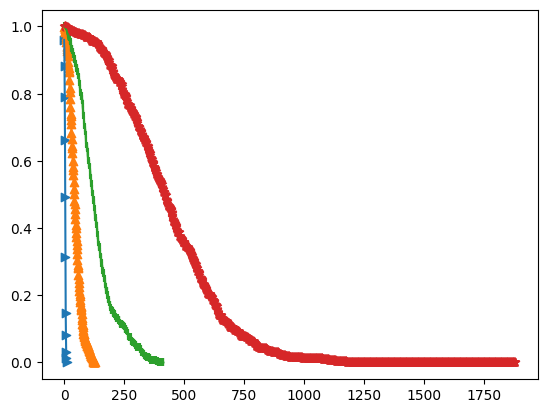

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def genLattice(m,p,s=10):
    a = s*np.array([1,0,0,0])
    b = s*np.array([1/2,np.sqrt(3)/2,0,0])
    m = m+2
    t = np.zeros((m*m,4))
    for i in range(m):
        for j in range(m):
            t[m*i+j] = a*i + b*j
            if i == 0:
                t[m*i+j,3] = 1
            elif i == m-1:
                t[m*i+j,3] = 1
            elif j == 0:
                t[m*i+j,3] = 1
            elif j == m-1:
                t[m*i+j,3] = 1
    for i in range(len(t)):
        t[i,2] = p
    return t

def render(t):
    for i in t:
        if i[3] == 1:
            plt.scatter(i[0], i[1], color='blue')
        else:
            plt.scatter(i[0],i[1],color='orange')
    plt.show()

ns = [5,50,167,500]
mark = ['>','^','|','*']

for v in range(len(ns)):
    #constants
    c1 = 6
    c2 = 5
    n = ns[v]
    ubs = []
    step = 0
    steps = []
    #Calculated constants
    beta = c2/n
    pInit = 1/(c1*n)
    m = 20
    
    t = genLattice(m,pInit)
    #render(t)
    
    m = m+2
    mn = m -2
    # Main while loop
    c = 0
    taff = []
    tburst = []
    while True:
        lastaff = list(taff)
        taff = []
        s = 0
        for i in t:
            s+= i[3]
        if s - (4*mn+4) >= (mn*mn):
            break
        burst = []
        for i in range(m):
            for j in range(m):
                if i == 0 or i == mn+1 or j == 0 or j ==mn+1:
                    continue
                o = m*i+j
                br = np.random.choice((1,0),p=[t[o,2],1-t[o,2]])
                if t[o,3] == 1:
                    continue
                elif t[o,3] == 0 and br==1:
                    t[o,3] = br
                    burst.append((i,j))
        # Random bursting over
        aff = []
        #print('BURST -> ',burst)
        for i in burst:
            x = i[0]
            y = i[1]
            aff.append((x-1,y+1))
            aff.append((x-1,y))
            aff.append((x,y-1))
            aff.append((x+1,y-1))
            aff.append((x+1,y))
            aff.append((x,y+1))
    
        #print('Initial affected bubbles')
        #for i in aff:
         #   x = i[0]
          #  y = i[1]
            #plt.scatter(t[m*x+y,0],t[m*x+y,1],color='red')
        #plt.show()
    
        while True:
            if len(burst) == 0:
                break
            else:
                burst = []
                for o in aff:
                    x, y = o
                    l = m*x+y
                    newP = t[l,2] + (beta/6)
                    if newP > 1 and t[l,3] == 0:
                        t[l,3] = 1
                        #print('Affected Bursting')
                        burst.append((x,y))
                    elif newP < 1 and t[l,3] == 0:
                        t[l,2] = newP
                        taff.append((x,y))
                aff = []
                for i in burst:
                    x = i[0]
                    y = i[1]
                    aff.append((x-1,y+1))
                    aff.append((x-1,y))
                    aff.append((x,y-1))
                    aff.append((x+1,y-1))
                    aff.append((x+1,y))
                    aff.append((x,y+1))
        #render(t)
        #print('TAFF -> ', taff)
        #print('LASTAFF -> ',lastaff)
        taff = list(set(taff))
        for i in lastaff:
            if i not in taff:
                x = i[0]
                y = i[1]
                o = m*x+y
                t[o,2] == pInit
                #print('Relaxed -> ', (x,y))
        c+=1
        ub = 0
        for i in t:
            if i[3] == 0:
                ub+=1
        ubs.append(ub/(mn*mn))
        step+=1
        steps.append(step)
    print(c/(mn*mn))
    plt.scatter(steps,ubs,marker=mark[v])
    plt.plot(steps,ubs)
    print('Done -> ',ns[v])
plt.savefig('graph1.png')
plt.show()

0
1
2
3
4
5
6
7
8
9
Done ->  0
0
1
2
3
4
5
6
7
8
9
Done ->  2
0
1
2
3
4
5
6
7
8
9
Done ->  4
0
1
2
3
4
5
6
7
8
9
Done ->  6
0
1
2
3
4
5
6
7
8
9
Done ->  10
0
1
2
3
4
5
6
7
8
9
Done ->  100


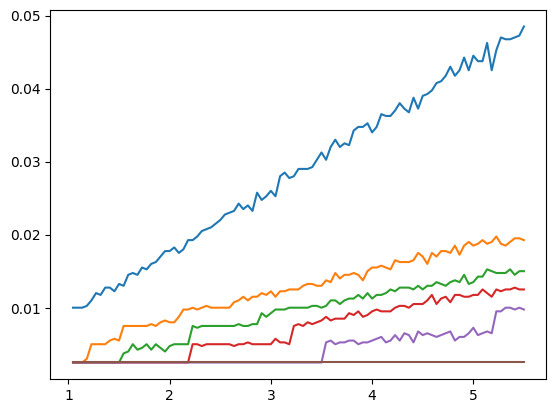

In [19]:
import numpy as np
import matplotlib.pyplot as plt
c_beta = [0,2,4,6,10,100]
for v in range(len(c_beta)):
    q = []
    w = []
    ns = np.linspace(1,5.5,100)
    c_60 = []
    for i in range(10):
        print(i)
        q = []
        w = []
        for k in ns:
            #constants
            c1 = 5
            c2 = c_beta[v]
            n = k
            q.append(k)
            
            def genLattice(m,p,s=10):
                a = s*np.array([1,0,0,0])
                b = s*np.array([1/2,np.sqrt(3)/2,0,0])
                m = m+2
                t = np.zeros((m*m,4))
                for i in range(m):
                    for j in range(m):
                        t[m*i+j] = a*i + b*j
                        if i == 0:
                            t[m*i+j,3] = 1
                        elif i == m-1:
                            t[m*i+j,3] = 1
                        elif j == 0:
                            t[m*i+j,3] = 1
                        elif j == m-1:
                            t[m*i+j,3] = 1
                for i in range(len(t)):
                    t[i,2] = p
                return t
            
            def render(t):
                for i in t:
                    if i[3] == 1:
                        plt.scatter(i[0], i[1], color='blue')
                    else:
                        plt.scatter(i[0],i[1],color='orange')
                plt.show()
            
            #Calculated constants
            beta = c2/n
            pInit = 1/(c1*n)
            m = 20
            
            t = genLattice(m,pInit)
            #render(t)
            
            m = m+2
            mn = m -2
            # Main while loop
            c = 0
            taff = []
            tburst = []
            while True:
                lastaff = list(taff)
                taff = []
                s = 0
                for i in t:
                    s+= i[3]
                if s - (4*mn + 4) >= (mn*mn)/2:
                    break
            
                burst = []
                for i in range(m):
                    for j in range(m):
                        o = m*i+j
                        br = np.random.choice((1,0),p=[t[o,2],1-t[o,2]])
                        if t[o,3] == 1:
                            continue
                        elif t[o,3] == 0 and br==1:
                            t[o,3] = br
                            burst.append((i,j))
                # Random bursting over
                aff = []
                #print('BURST -> ',burst)
                for i in burst:
                    x = i[0]
                    y = i[1]
                    aff.append((x-1,y+1))
                    aff.append((x-1,y))
                    aff.append((x,y-1))
                    aff.append((x+1,y-1))
                    aff.append((x+1,y))
                    aff.append((x,y+1))
            
                #print('Initial affected bubbles')
                #for i in aff:
                 #   x = i[0]
                  #  y = i[1]
                    #plt.scatter(t[m*x+y,0],t[m*x+y,1],color='red')
                #plt.show()
            
                while True:
                    if len(burst) == 0:
                        break
                    else:
                        burst = []
                        for o in aff:
                            x, y = o
                            l = m*x+y
                            newP = t[l,2] + (beta/6)
                            if newP > 1 and t[l,3] == 0:
                                t[l,3] = 1
                                #print('Affected Bursting')
                                burst.append((x,y))
                            elif newP < 1 and t[l,3] == 0:
                                t[l,2] = newP
                                taff.append((x,y))
                        aff = []
                        for i in burst:
                            x = i[0]
                            y = i[1]
                            aff.append((x-1,y+1))
                            aff.append((x-1,y))
                            aff.append((x,y-1))
                            aff.append((x+1,y-1))
                            aff.append((x+1,y))
                            aff.append((x,y+1))
                #render(t)
                    
                taff = list(set(taff))
                for i in lastaff:
                    if i not in taff:
                        x = i[0]
                        y = i[1]
                        o = m*x+y
                        t[o,2] == pInit
                        #print('Relaxed -> ', (x,y))
                c+=1
            #print(c/(mn*mn))
            w.append(c/(mn*mn))
        c_60.append(list(w))
    
    def avgList(l):
        '''
        This function averages a list of lists,
        and returns the average list
        '''
        r = []
        for i in range(len(l[0])):
            s = 0
            for j in range(len(l)):
                s+=l[j][i]
            r.append(s/len(l))
        return r
    
    c_av = avgList(c_60)
    plt.plot(q[1:],c_av[1:])
    print('Done -> ',c_beta[v])
plt.savefig('graph2.png')
plt.show()

Done ->  1.2
Done ->  1.5
Done ->  1.7
Done ->  2.5
Done ->  3.5
Done ->  5


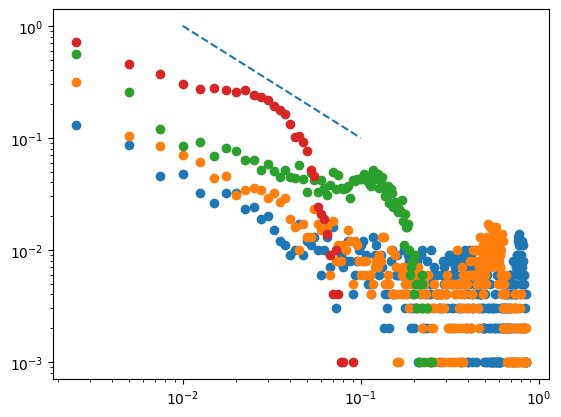

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def genLattice(m,p,s=10):
    a = s*np.array([1,0,0,0])
    b = s*np.array([1/2,np.sqrt(3)/2,0,0])
    m = m+2
    t = np.zeros((m*m,4))
    for i in range(m):
        for j in range(m):
            t[m*i+j] = a*i + b*j
            if i == 0:
                t[m*i+j,3] = 1
            elif i == m-1:
                t[m*i+j,3] = 1
            elif j == 0:
                t[m*i+j,3] = 1
            elif j == m-1:
                t[m*i+j,3] = 1
    for i in range(len(t)):
        t[i,2] = p
    return t

def render(t):
    for i in t:
        if i[3] == 1:
            plt.scatter(i[0], i[1], color='blue')
        else:
            plt.scatter(i[0],i[1],color='orange')
    plt.show()

ns = [1.2,1.5,1.7,2.5,3.5,5]
mark = ['>','^','|','*']
av_dicts = []
runs = 1000
for v in range(len(ns)):
    ava = dict()
    for vx in range(runs):
        #constants
        c1 = 6
        c2 = 3
        n = ns[v]
        ubs = []
        step = 0
        steps = []
        #Calculated constants
        beta = c2/n
        pInit = 1/(c1*n)
        m = 20
        
        t = genLattice(m,pInit)
        #render(t)
        
        m = m+2
        mn = m -2
        # Main while loop
        c = 0
        taff = []
        tburst = []
        while True:
            lastaff = list(taff)
            taff = []
            s = 0
            for i in t:
                s+= i[3]
            if s - (4*mn+4) >= (mn*mn):
                break
            burst = []
            for i in range(m):
                for j in range(m):
                    if i == 0 or i == mn+1 or j == 0 or j ==mn+1:
                        continue
                    o = m*i+j
                    br = np.random.choice((1,0),p=[t[o,2],1-t[o,2]])
                    if t[o,3] == 1:
                        continue
                    elif t[o,3] == 0 and br==1:
                        t[o,3] = br
                        burst.append((i,j))
            # Random bursting over
            aff = []
            #print('BURST -> ',burst)
            for i in burst:
                x = i[0]
                y = i[1]
                aff.append((x-1,y+1))
                aff.append((x-1,y))
                aff.append((x,y-1))
                aff.append((x+1,y-1))
                aff.append((x+1,y))
                aff.append((x,y+1))
        
            #print('Initial affected bubbles')
            #for i in aff:
             #   x = i[0]
              #  y = i[1]
                #plt.scatter(t[m*x+y,0],t[m*x+y,1],color='red')
            #plt.show()
            c = 0
            while True:
                if len(burst) == 0:
                    break
                else:
                    burst = []
                    for o in aff:
                        x, y = o
                        l = m*x+y
                        newP = t[l,2] + (beta/6)
                        if newP > 1 and t[l,3] == 0:
                            t[l,3] = 1
                            #print('Affected Bursting')
                            c+=1
                            burst.append((x,y))
                        elif newP < 1 and t[l,3] == 0:
                            t[l,2] = newP
                            taff.append((x,y))
                    aff = []
                    for i in burst:
                        x = i[0]
                        y = i[1]
                        aff.append((x-1,y+1))
                        aff.append((x-1,y))
                        aff.append((x,y-1))
                        aff.append((x+1,y-1))
                        aff.append((x+1,y))
                        aff.append((x,y+1))
            #render(t)
            #print('TAFF -> ', taff)
            #print('LASTAFF -> ',lastaff)
            taff = list(set(taff))
            for i in lastaff:
                if i not in taff:
                    x = i[0]
                    y = i[1]
                    o = m*x+y
                    t[o,2] == pInit
                    #print('Relaxed -> ', (x,y))
            if not (c==0):
                if c/(mn*mn) in ava.keys():
                    ava[c/(mn*mn)] = ava[c/(mn*mn)]+1
                else:
                    ava[c/(mn*mn)] = 1
    print('Done -> ', ns[v])
    av_dicts.append(dict(ava))

plt.yscale("log")
plt.xscale("log")
for i in av_dicts:
    x = []
    y = []
    for j in i.keys():
        x.append(j)
        y.append(i[j]/runs)
    plt.scatter(x,y)
    #plt.plot(x,y)
x = np.linspace(0.01,0.1,1000)
y = [(1/i)/100 for i in x]
plt.plot(x,y,ls='--')
plt.savefig('graph3.png')
plt.show()